# Numerical ODEs

ODE: 
$$
{dy \over dx} = y - x^2
$$

solution:

$$
y = x^2 + 2x + 2 - e^x
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 欧拉法
def euler_method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    for i in range(n):
        y[i+1] = y[i] + h * f(x[i], y[i])
        x[i+1] = x[i] + h
    return x, y


# 改进欧拉法
def improved_euler_method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i+1] = y[i] + h * 0.5 * (k1 + k2)
        x[i+1] = x[i] + h
    return x, y


# 通用龙格-库塔法实现
def runge_kutta_method(f, x0, y0, h, n, order):
    """
    通用龙格-库塔法
    :param f: 微分方程 dy/dx = f(x, y)
    :param x0: 初始 x 值
    :param y0: 初始 y 值
    :param h: 步长
    :param n: 步数
    :param order: 龙格-库塔法的阶数 (2到10)
    :return: x 和 y 的数组
    """
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0], y[0] = x0, y0

    # 龙格-库塔法的系数
    if order == 2:
        # 二阶龙格-库塔法 (中点法)
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/2, y[i] + h/2 * k1)
            y[i+1] = y[i] + h * k2
            x[i+1] = x[i] + h
    elif order == 3:
        # 三阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/2, y[i] + h/2 * k1)
            k3 = f(x[i] + h, y[i] - h*k1 + 2*h*k2)
            y[i+1] = y[i] + h/6 * (k1 + 4*k2 + k3)
            x[i+1] = x[i] + h
    elif order == 4:
        # 四阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/2, y[i] + h/2 * k1)
            k3 = f(x[i] + h/2, y[i] + h/2 * k2)
            k4 = f(x[i] + h, y[i] + h * k3)
            y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
            x[i+1] = x[i] + h
    elif order == 5:
        # 五阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/4, y[i] + h/4 * k1)
            k3 = f(x[i] + h/4, y[i] + h/8 * k1 + h/8 * k2)
            k4 = f(x[i] + h/2, y[i] - h/2 * k2 + h * k3)
            k5 = f(x[i] + 3*h/4, y[i] + 3*h/16 * k1 + 9*h/16 * k4)
            k6 = f(x[i] + h, y[i] - 3*h/7 * k1 + 2*h/7 * k2 + 12*h/7 * k3 - 12*h/7 * k4 + 8*h/7 * k5)
            y[i+1] = y[i] + h/90 * (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)
            x[i+1] = x[i] + h
    elif order == 6:
        # 六阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/3, y[i] + h/3 * k1)
            k3 = f(x[i] + h/3, y[i] + h/6 * k1 + h/6 * k2)
            k4 = f(x[i] + h/2, y[i] + h/8 * k1 + 3*h/8 * k3)
            k5 = f(x[i] + h, y[i] + h/2 * k1 - 3*h/2 * k3 + 2*h * k4)
            k6 = f(x[i] + h, y[i] - 3*h/2 * k1 + 2*h * k2 + h/2 * k4 - h/2 * k5)
            y[i+1] = y[i] + h/24 * (k1 + 4*k4 + k5)
            x[i+1] = x[i] + h
    elif order == 7:
        # 七阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/5, y[i] + h/5 * k1)
            k3 = f(x[i] + 3*h/10, y[i] + 3*h/40 * k1 + 9*h/40 * k2)
            k4 = f(x[i] + 4*h/5, y[i] + 44*h/45 * k1 - 56*h/15 * k2 + 32*h/9 * k3)
            k5 = f(x[i] + 8*h/9, y[i] + 19372*h/6561 * k1 - 25360*h/2187 * k2 + 64448*h/6561 * k3 - 212*h/729 * k4)
            k6 = f(x[i] + h, y[i] + 9017*h/3168 * k1 - 355*h/33 * k2 + 46732*h/5247 * k3 + 49*h/176 * k4 - 5103*h/18656 * k5)
            k7 = f(x[i] + h, y[i] + 35*h/384 * k1 + 500*h/1113 * k3 + 125*h/192 * k4 - 2187*h/6784 * k5 + 11*h/84 * k6)
            y[i+1] = y[i] + h * (35*k1/384 + 500*k3/1113 + 125*k4/192 - 2187*k5/6784 + 11*k6/84)
            x[i+1] = x[i] + h
    elif order == 8:
        # 八阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/6, y[i] + h/6 * k1)
            k3 = f(x[i] + h/3, y[i] + h/24 * k1 + h/8 * k2)
            k4 = f(x[i] + h/2, y[i] + h/16 * k1 + 3*h/16 * k3)
            k5 = f(x[i] + 2*h/3, y[i] + h/8 * k1 - 3*h/8 * k3 + h * k4)
            k6 = f(x[i] + h, y[i] + 7*h/90 * k1 + 16*h/45 * k4 + 2*h/15 * k5)
            k7 = f(x[i] + h, y[i] + 2*h/55 * k1 + 9*h/110 * k4 + 8*h/55 * k5 + h/22 * k6)
            k8 = f(x[i] + h, y[i] + 19*h/840 * k1 + 3*h/40 * k4 + 3*h/20 * k5 + 3*h/28 * k6 + 3*h/70 * k7)
            y[i+1] = y[i] + h * (19*k1/840 + 3*k4/40 + 3*k5/20 + 3*k6/28 + 3*k7/70)
            x[i+1] = x[i] + h
    elif order == 9:
        # 九阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/12, y[i] + h/12 * k1)
            k3 = f(x[i] + h/6, y[i] + h/48 * k1 + h/16 * k2)
            k4 = f(x[i] + h/4, y[i] + h/32 * k1 + 3*h/32 * k3)
            k5 = f(x[i] + h/2, y[i] + h/16 * k1 - 3*h/16 * k3 + h/2 * k4)
            k6 = f(x[i] + 3*h/4, y[i] + 3*h/64 * k1 + 9*h/64 * k4 + 3*h/16 * k5)
            k7 = f(x[i] + h, y[i] + 7*h/90 * k1 + 16*h/45 * k4 + 2*h/15 * k5 + h/18 * k6)
            k8 = f(x[i] + h, y[i] + 2*h/55 * k1 + 9*h/110 * k4 + 8*h/55 * k5 + h/22 * k6 + h/55 * k7)
            k9 = f(x[i] + h, y[i] + 19*h/840 * k1 + 3*h/40 * k4 + 3*h/20 * k5 + 3*h/28 * k6 + 3*h/70 * k7 + h/140 * k8)
            y[i+1] = y[i] + h * (19*k1/840 + 3*k4/40 + 3*k5/20 + 3*k6/28 + 3*k7/70 + k8/140)
            x[i+1] = x[i] + h
    elif order == 10:
        # 十阶龙格-库塔法
        for i in range(n):
            k1 = f(x[i], y[i])
            k2 = f(x[i] + h/20, y[i] + h/20 * k1)
            k3 = f(x[i] + h/10, y[i] + h/80 * k1 + 3*h/80 * k2)
            k4 = f(x[i] + 3*h/20, y[i] + 3*h/160 * k1 + 9*h/160 * k3)
            k5 = f(x[i] + h/5, y[i] + h/40 * k1 - 9*h/40 * k3 + h/2 * k4)
            k6 = f(x[i] + 3*h/10, y[i] + 3*h/320 * k1 + 9*h/320 * k4 + 3*h/40 * k5)
            k7 = f(x[i] + 2*h/5, y[i] + 7*h/360 * k1 + 16*h/90 * k4 + 2*h/15 * k5 + h/18 * k6)
            k8 = f(x[i] + h/2, y[i] + 2*h/55 * k1 + 9*h/110 * k4 + 8*h/55 * k5 + h/22 * k6 + h/55 * k7)
            k9 = f(x[i] + 7*h/10, y[i] + 19*h/1680 * k1 + 3*h/40 * k4 + 3*h/20 * k5 + 3*h/28 * k6 + 3*h/70 * k7 + h/140 * k8)
            k10 = f(x[i] + h, y[i] + 19*h/840 * k1 + 3*h/40 * k4 + 3*h/20 * k5 + 3*h/28 * k6 + 3*h/70 * k7 + h/140 * k8 + h/280 * k9)
            y[i+1] = y[i] + h * (19*k1/840 + 3*k4/40 + 3*k5/20 + 3*k6/28 + 3*k7/70 + k8/140 + k9/280)
            x[i+1] = x[i] + h
    else:
        raise ValueError("阶数必须是2到10之间的整数")

    return x, y

In [3]:
# 定义微分方程 dy/dx = f(x, y)
f = lambda x, y: y - x**2

# 解析解
def exact_solution(x):
    return x**2 + 2*x + 2 - np.exp(x)

# 初始条件
x0, y0 = 0, 1

# 步长和步数
h = 0.05
n = 50

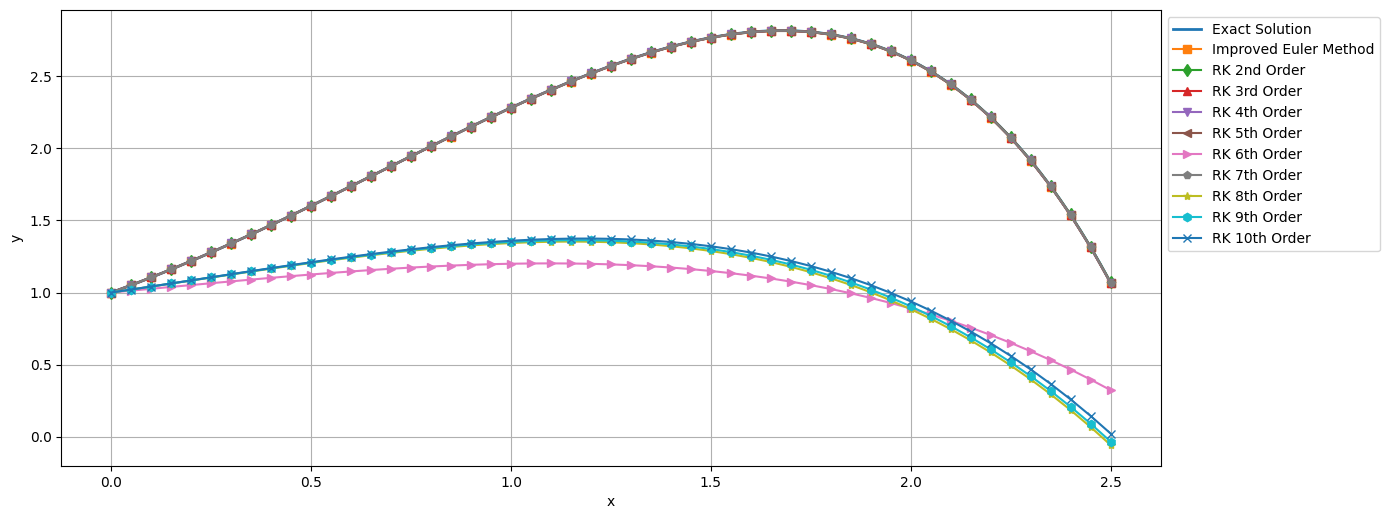

In [4]:
# 计算数值解
x_euler, y_euler = euler_method(f, x0, y0, h, n)
x_improved, y_improved = improved_euler_method(f, x0, y0, h, n)
x_rk2, y_rk2 = runge_kutta_method(f, x0, y0, h, n, order=2)
x_rk3, y_rk3 = runge_kutta_method(f, x0, y0, h, n, order=3)
x_rk4, y_rk4 = runge_kutta_method(f, x0, y0, h, n, order=4)
x_rk5, y_rk5 = runge_kutta_method(f, x0, y0, h, n, order=5)
x_rk6, y_rk6 = runge_kutta_method(f, x0, y0, h, n, order=6)
x_rk7, y_rk7 = runge_kutta_method(f, x0, y0, h, n, order=7)
x_rk8, y_rk8 = runge_kutta_method(f, x0, y0, h, n, order=8)
x_rk9, y_rk9 = runge_kutta_method(f, x0, y0, h, n, order=9)
x_rk10, y_rk10 = runge_kutta_method(f, x0, y0, h, n, order=10)

# 计算解析解
x_exact = np.linspace(x0, x0 + n*h, 100)
y_exact = exact_solution(x_exact)

# 可视化
plt.figure(figsize=(14, 10))

# 全局图
plt.subplot(2, 1, 1)
plt.plot(x_exact, y_exact, label='Exact Solution', linewidth=2)
# plt.plot(x_euler, y_euler, 'o-', label='Euler Method')
plt.plot(x_improved, y_improved, 's-', label='Improved Euler Method')
plt.plot(x_rk2, y_rk2, 'd-', label='RK 2nd Order')
plt.plot(x_rk3, y_rk3, '^-', label='RK 3rd Order')
plt.plot(x_rk4, y_rk4, 'v-', label='RK 4th Order')
plt.plot(x_rk5, y_rk5, '<-', label='RK 5th Order')
plt.plot(x_rk6, y_rk6, '>-', label='RK 6th Order')
plt.plot(x_rk7, y_rk7, 'p-', label='RK 7th Order')
plt.plot(x_rk8, y_rk8, '*-', label='RK 8th Order')
plt.plot(x_rk9, y_rk9, 'h-', label='RK 9th Order')
plt.plot(x_rk10, y_rk10, 'x-', label='RK 10th Order')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

plt.tight_layout()
plt.show()

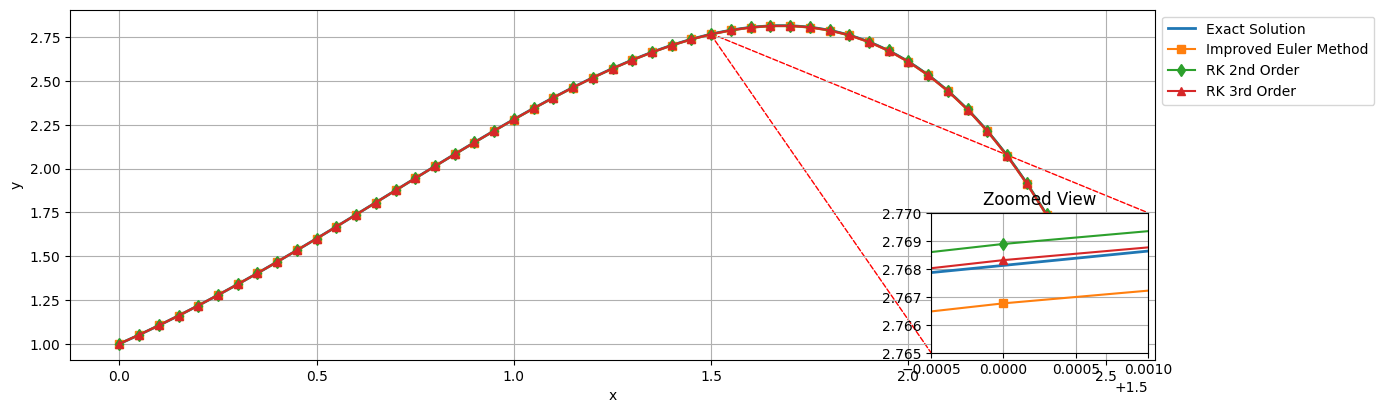

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

# 可视化
plt.figure(figsize=(14, 10))

# 全局图
ax = plt.subplot(2, 1, 1)
plt.plot(x_exact, y_exact, label='Exact Solution', linewidth=2)
plt.plot(x_improved, y_improved, 's-', label='Improved Euler Method')
plt.plot(x_rk2, y_rk2, 'd-', label='RK 2nd Order')
plt.plot(x_rk3, y_rk3, '^-', label='RK 3rd Order')
# plt.plot(x_rk4, y_rk4, 'v-', label='RK 4th Order')
# plt.plot(x_rk5, y_rk5, '<-', label='RK 5th Order')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

# 定义需要放大的区间
zoom_x_min, zoom_x_max = 1.4995, 1.501  # 放大区间的 x 范围
zoom_y_min, zoom_y_max = 2.765, 2.770  # 放大区间的 y 范围
# zoom_x_min, zoom_x_max = 2.4, 2.49  # 放大区间的 x 范围
# zoom_y_min, zoom_y_max = 1.3, 1.33  # 放大区间的 y 范围

# 在全局图中标记放大区域
ax.add_patch(plt.Rectangle((zoom_x_min, zoom_y_min), 
                           zoom_x_max - zoom_x_min, 
                           zoom_y_max - zoom_y_min, 
                           edgecolor='red', facecolor='none', linestyle='--'))

# 添加放大图
ax_inset = inset_axes(ax, width="20%", height="40%", loc='lower right')
ax_inset.plot(x_exact, y_exact, label='Exact Solution', linewidth=2)
ax_inset.plot(x_improved, y_improved, 's-', label='Improved Euler Method')
ax_inset.plot(x_rk2, y_rk2, 'd-', label='RK 2nd Order')
ax_inset.plot(x_rk3, y_rk3, '^-', label='RK 3rd Order')
# ax_inset.plot(x_rk4, y_rk4, 'v-', label='RK 4th Order')
# ax_inset.plot(x_rk5, y_rk5, '<-', label='RK 5th Order')
ax_inset.set_xlim(zoom_x_min, zoom_x_max)
ax_inset.set_ylim(zoom_y_min, zoom_y_max)
ax_inset.grid()
ax_inset.set_title('Zoomed View')
# 添加连接线
# 从全局图的矩形框到放大图的边框
con = ConnectionPatch(xyA=(zoom_x_min, zoom_y_min), coordsA=ax.transData,
                      xyB=(zoom_x_min, zoom_y_min), coordsB=ax_inset.transData,
                      linestyle="--", color="red")
ax.add_artist(con)

con2 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_max), coordsA=ax.transData,
                       xyB=(zoom_x_max, zoom_y_max), coordsB=ax_inset.transData,
                       linestyle="--", color="red")
ax.add_artist(con2)
# plt.tight_layout()
plt.show()